# Machine Learning (Updated)

## Problem:
To find out if the machine learning models can classify the keywords of movies and predict the genre of the movie in a test set correctly.

If machine learning can predict the genre correctly, it means there is relevance between the keywords and the genre.
This means there is a way to predict the genre just with keywords, solving our objective.


In [25]:
!pip install -q scikit-multilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.5 MB/s eta 0:00:00


In [26]:
import pandas as pd
import numpy as np
import json
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline

In [27]:
df= pd.read_csv('occur_cleaned_data.csv')
df.head()

,title,id,genres,keywords
0,Blondie,3924,['Comedy'],['blondi']
1,Four Rooms,5,"['Crime', 'Comedy']","['hotel', ""new year's ev"", 'witch', 'bet', 'ho..."
2,Judgment Night,6,"['Action', 'Thriller', 'Crime']","['chicago, illinoi', 'drug deal', 'escap', 'on..."
3,Life in Loops (A Megacities RMX),8,['Documentary'],[]
4,Star Wars,11,"['Adventure', 'Action', 'Science Fiction']","['android', 'galaxi', 'hermit', 'death star', ..."


In [28]:
df.shape

(19593, 4)

### String processing.

'genres' in csv/xlsx was stored as string instead of a list

In [29]:
# Using ast to convert genres from string to list.
import ast
# For loop on all the strings
for i in range(df.shape[0]):
    df['genres'][i] = ast.literal_eval(df['genres'][i])

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['genres'][i] = ast.literal_eval(df['genres'][i])
/tmp/ipython-input-29-1971585554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'][i] = ast.literal_eval(df['genres'][i])
/tmp/ipython-input-29-1971585554.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave a

In [30]:
df.head()

,title,id,genres,keywords
0,Blondie,3924,[Comedy],['blondi']
1,Four Rooms,5,"[Crime, Comedy]","['hotel', ""new year's ev"", 'witch', 'bet', 'ho..."
2,Judgment Night,6,"[Action, Thriller, Crime]","['chicago, illinoi', 'drug deal', 'escap', 'on..."
3,Life in Loops (A Megacities RMX),8,[Documentary],[]
4,Star Wars,11,"[Adventure, Action, Science Fiction]","['android', 'galaxi', 'hermit', 'death star', ..."


In [31]:
# String processing on 'keywords'. Remove whitespaces
for i in range(df.shape[0]):
    df['keywords'][i] = df['keywords'][i].replace(" ", "")

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['keywords'][i] = df['keywords'][i].replace(" ", "")
/tmp/ipython-input-31-1203113996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'][i] = df['keywords'][i].replace(" ", "")
/tmp/ipython-input-31-1203113996.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will be

In [32]:
df.head(100)

,title,id,genres,keywords
0,Blondie,3924,[Comedy],['blondi']
1,Four Rooms,5,"[Crime, Comedy]","['hotel',""newyear'sev"",'witch','bet','hotelroo..."
2,Judgment Night,6,"[Action, Thriller, Crime]","['chicago,illinoi','drugdeal','escap','onenigh..."
3,Life in Loops (A Megacities RMX),8,[Documentary],[]
4,Star Wars,11,"[Adventure, Action, Science Fiction]","['android','galaxi','hermit','deathstar','jedi..."
...,...,...,...,...
95,28 Days Later,170,"[Horror, Thriller, Science Fiction]","['london,england','taxi','manchesterc','submac..."
96,Star Trek V: The Final Frontier,172,"[Science Fiction, Action, Adventure, Thriller]","['feder','lossoflovedon','selfsacrific','hosta..."
97,"20,000 Leagues Under the Sea",173,"[Adventure, Drama, Family, Fantasy, Science Fi...","['dive','ocean','submarin','julesvern','captai..."
98,Star Trek VI: The Undiscovered Country,174,"[Science Fiction, Action, Adventure, Thriller]","['farewel','feder','courtcas','plan','spaceope..."


### sanity check

In [33]:
df['genres'][10000][0]

'Documentary'

In [34]:
df['keywords'][2]

"['chicago,illinoi','drugdeal','escap','onenight','box']"

## Multi-Label Classification
### Problem Transformation : Binary Relevance

Each target variable (genre) is treated independently.
Multi-label classification reduced to n classification problems


MultiLabelBinarizer module transforms iterable of iterables to a binary matrix.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html

In [35]:
from sklearn.preprocessing import MultiLabelBinarizer

# transform target variable
multilabel_binarizer = MultiLabelBinarizer()
y = multilabel_binarizer.fit_transform(df['genres'])

In [36]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
y.shape

(19593, 19)

19 Genres encoded

### Split dataset into training and test set

In [38]:
# split
X_train, X_test, y_train, y_test = train_test_split(df['keywords'], y, test_size=0.2, random_state=9)

In [39]:
X_train

,keywords
13723,"['biographi','stripper','basedonplayormus','do..."
2110,"['detect','murdermysteri']"
12093,"['boxer','biographi','sport','box']"
7306,"['cyborg','sequel','basedoncartoon']"
1742,"['worldwarii','burma']"
...,...
4532,"['waitress','forbiddenlov','singlefath','extra..."
4673,"['london,england','detect','alcohol','victoria..."
5014,"['warcrim','massmurd','histori','nativeamerica..."
9979,"['bootlegg','report','pre-cod']"


In [40]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

### Tf-idf vectorizer
https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [41]:
# create TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# For test set, transform into document-term matrix without learning vocabulary dictionary
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [42]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 82915 stored elements and shape (15674, 5233)>

### Performance Metric
- F1 score
- Hamming Loss

In [43]:
# Performance metric function
import sklearn.metrics as metrics
def calculate_metrics(y_test, y_pred):
    br_f1=metrics.f1_score(y_test, y_pred, average='micro')
    br_hamm=metrics.hamming_loss(y_test,y_pred)
    return br_f1, br_hamm

def print_metrics(f1, hamm):
    print('F1-score:',round(f1,3))
    print('Hamming Loss:',round(hamm,3))



## Binary relevance (Updated)
Using scikit-multilearn library
http://scikit.ml/api/skmultilearn.problem_transform.br.html

Random Forest

In [44]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier

classifier_RF = BinaryRelevance(
    classifier = RandomForestClassifier(),
    require_dense = [False, True]
)

classifier_RF.fit(X_train_tfidf, y_train)


BinaryRelevance(classifier=RandomForestClassifier(),
                require_dense=[False, True])

In [45]:
y_pred = classifier_RF.predict(X_test_tfidf)

In [46]:
RF_f1, RF_hamm = calculate_metrics(y_test, y_pred)
print_metrics(RF_f1, RF_hamm)

F1-score: 0.503
Hamming Loss: 0.096


SVC

In [47]:
from sklearn.svm import SVC

classifier_SVC = BinaryRelevance(
    classifier = SVC(),
    require_dense = [False, True]
)

classifier_SVC.fit(X_train_tfidf, y_train)

BinaryRelevance(classifier=SVC(), require_dense=[False, True])

In [48]:
# make predictions for test set
y_pred = classifier_SVC.predict(X_test_tfidf)

In [49]:
SVC_f1, SVC_hamm = calculate_metrics(y_test, y_pred)
print_metrics(SVC_f1, SVC_hamm)

F1-score: 0.475
Hamming Loss: 0.092


In [50]:
# Using other classifiers
from sklearn.linear_model import LogisticRegression

classifier_LR = BinaryRelevance(
    classifier = LogisticRegression(),
    require_dense = [False, True]
)

classifier_LR.fit(X_train_tfidf, y_train)

BinaryRelevance(classifier=LogisticRegression(), require_dense=[False, True])

In [51]:
y_pred = classifier_LR.predict(X_test_tfidf)


In [52]:
LR_f1, LR_hamm = calculate_metrics(y_test, y_pred)
print_metrics(LR_f1, LR_hamm)

F1-score: 0.447
Hamming Loss: 0.094


## Predict a movie example on test set

Application

In [53]:
def infer_tags(q):
    q_vec = tfidf_vectorizer.transform([q])
    q_pred_RF = classifier_RF.predict(q_vec)
    q_pred_SVC = classifier_SVC.predict(q_vec)
    q_pred_LR = classifier_LR.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred_RF), multilabel_binarizer.inverse_transform(q_pred_SVC), multilabel_binarizer.inverse_transform(q_pred_LR)

In [54]:
for i in range(3):
    k = X_test.sample(1).index[0]
    RFpredict,SVCpredict, LRpredict  = infer_tags(X_test[k])
    print("Movie: ", df['title'][k])
    print("\nKeywords: ", df['keywords'][k] )
    print("\nPredicted genre using: ")
    print("Random Forest : ",  RFpredict )
    print("SVC : ",  SVCpredict )
    print("Logistic Regression : ",  LRpredict )
    print("Actual genre: ", df['genres'][k], "\n")
    print("//////////////////////////////////////////////////////////")

Movie:  Dreamscape

Keywords:  ['u.s.presid','monster','dream','heart','telekinesi','psychic','scienc']

Predicted genre using: 
Random Forest :  [('Horror', 'Science Fiction')]
SVC :  [('Horror',)]
Logistic Regression :  [('Science Fiction',)]
Actual genre:  ['Adventure', 'Science Fiction', 'Horror'] 

//////////////////////////////////////////////////////////
Movie:  Return to Me

Keywords:  ['transplant',"loveofone'slif",'veterinarian','womandirector']

Predicted genre using: 
Random Forest :  [('Romance',)]
SVC :  [('Romance',)]
Logistic Regression :  [('Romance',)]
Actual genre:  ['Romance', 'Comedy'] 

//////////////////////////////////////////////////////////
Movie:  Supervolcano

Keywords:  ['disast']

Predicted genre using: 
Random Forest :  [('Action', 'Thriller')]
SVC :  [()]
Logistic Regression :  [()]
Actual genre:  ['Action', 'Drama', 'Thriller'] 

//////////////////////////////////////////////////////////


## Baseline

In [60]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, hamming_loss
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test_tfidf)
Dummy_f1, Dummy_hamm = calculate_metrics(y_test, y_pred)
print_metrics(Dummy_f1, Dummy_hamm)

F1-score: 0.0
Hamming Loss: 0.119


## Observation

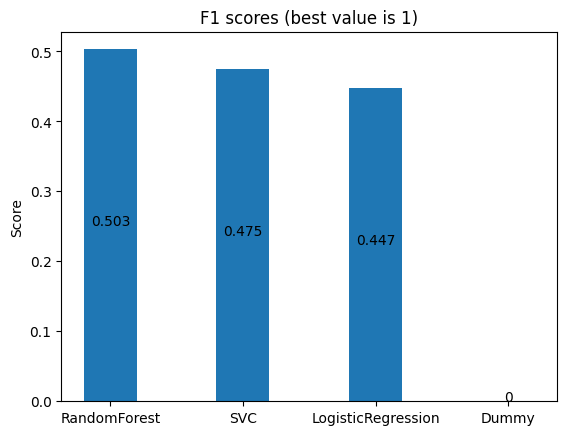

In [57]:
# Bar plot f1
classifiers = ['RandomForest', 'SVC', 'LogisticRegression', 'Dummy']
f1_group = [RF_f1, SVC_f1, LR_f1, Dummy_f1]
f1_group_round = [ round(x,3) for x in f1_group]
hamm_group = [RF_hamm, SVC_hamm, LR_hamm, Dummy_hamm]
hamm_group_round = [ round(x,3) for x in hamm_group]
x = np.arange(4)

fig, ax = plt.subplots()
rects1 = ax.bar(x, f1_group_round, width=0.4)

ax.set_ylabel('Score')
ax.set_title('F1 scores (best value is 1)')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.bar_label(rects1, label_type='center', padding=3)
plt.show()

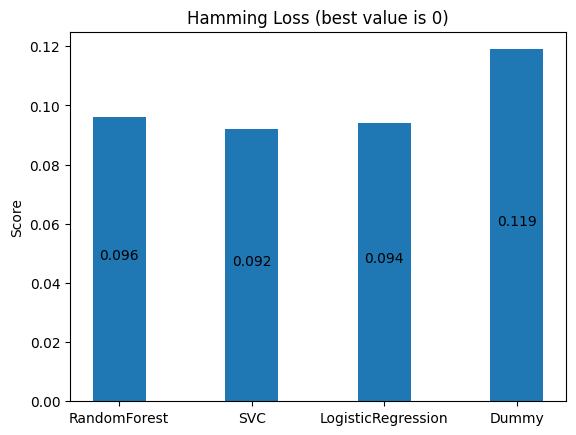

In [58]:
# barplot Hamming loss
fig, ax = plt.subplots()
rects2 = ax.bar(x, hamm_group_round, width=0.4)

ax.set_ylabel('Score')
ax.set_title('Hamming Loss (best value is 0)')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.bar_label(rects2, label_type='center', padding=3)
plt.show()